## Isolation Forest for Outlier detection

#### IsolationForest
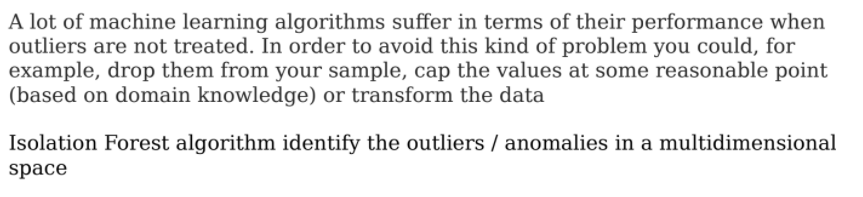

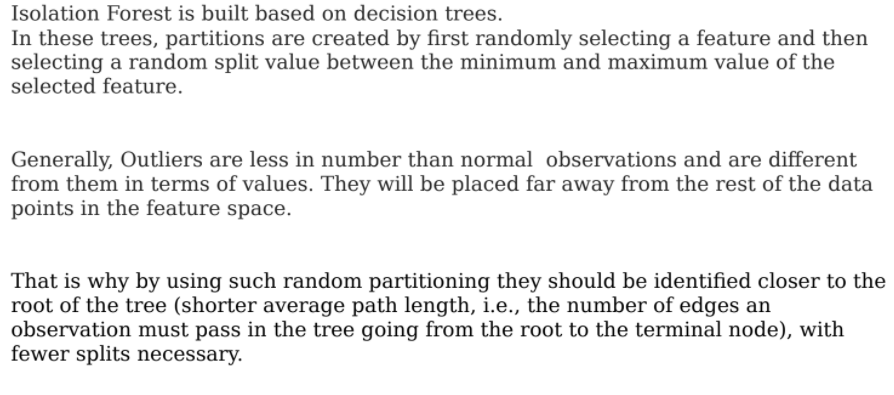

In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
data =pd.read_csv("iris.csv",index_col=0)

In [2]:
data =pd.read_csv("iris.csv",index_col=0)
data_encoded=pd.get_dummies(data)

In [3]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data_encoded)

IsolationForest(contamination=0.01, random_state=10)

In [4]:
# predictions
y_pred_outliers = clf.predict(data_encoded)

In [5]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
data_encoded

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0,0,1
147,6.3,2.5,5.0,1.9,0,0,1
148,6.5,3.0,5.2,2.0,0,0,1
149,6.2,3.4,5.4,2.3,0,0,1


In [7]:
## Let us add a new data point which is outlier
data_encoded.loc[150]=[20,40,30,50,1,0,0]

In [8]:
data_encoded

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0,0,1
147,6.3,2.5,5.0,1.9,0,0,1
148,6.5,3.0,5.2,2.0,0,0,1
149,6.2,3.4,5.4,2.3,0,0,1


In [9]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data_encoded)
# predictions
y_pred_outliers = clf.predict(data_encoded)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

In [10]:
data_encoded['scores']=clf.decision_function(data_encoded)

In [11]:
data_encoded['anomaly']=clf.predict(data_encoded.iloc[:,0:7])

In [12]:
data_encoded

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica,scores,anomaly
1,5.1,3.5,1.4,0.2,1,0,0,0.202073,1
2,4.9,3.0,1.4,0.2,1,0,0,0.185411,1
3,4.7,3.2,1.3,0.2,1,0,0,0.174012,1
4,4.6,3.1,1.5,0.2,1,0,0,0.182873,1
5,5.0,3.6,1.4,0.2,1,0,0,0.199432,1
...,...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0,0,1,0.164313,1
147,6.3,2.5,5.0,1.9,0,0,1,0.133436,1
148,6.5,3.0,5.2,2.0,0,0,1,0.179224,1
149,6.2,3.4,5.4,2.3,0,0,1,0.125229,1


In [33]:
#Print the outlier data points
data_encoded[data_encoded['anomaly']==-1]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica,scores,anomaly
107,4.9,2.5,4.5,1.7,0,0,1,-0.009111,-1
150,20.0,40.0,30.0,50.0,1,0,0,-0.287374,-1


### PPS score

In [31]:
#install the package
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12992 sha256=c46ca9588e217ec4294cf47849362466117998cbb8f69a59b2ce8c75b4e37de3
  Stored in directory: c:\users\sonal\appdata\local\pip\cache\wheels\e1\45\ce\6bb5da9f22f466ba4e0ef6e3a3d2bbcde992f96c550165fc60
Successfully built ppscore


In [32]:
import ppscore as pps

In [33]:
#pps.score(df, "feature_column", "target_column")  syntax
pps.score(data, "Sepal.Length", "Petal.Length")

{'x': 'Sepal.Length',
 'y': 'Petal.Length',
 'ppscore': 0.550422595049248,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.4886666666666668,
 'model_score': 0.6692708968366863,
 'model': DecisionTreeRegressor()}

In [34]:
#calculate the whole PPS matrix
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sepal.Length,Sepal.Length,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sepal.Length,Sepal.Width,0.000000,regression,True,mean absolute error,0.330667,0.364704,DecisionTreeRegressor()
2,Sepal.Length,Petal.Length,0.550423,regression,True,mean absolute error,1.488667,0.669271,DecisionTreeRegressor()
3,Sepal.Length,Petal.Width,0.431739,regression,True,mean absolute error,0.644667,0.366339,DecisionTreeRegressor()
4,Sepal.Length,Species,0.471649,classification,True,weighted F1,0.353333,0.658333,DecisionTreeClassifier()
5,Sepal.Width,Sepal.Length,0.006966,regression,True,mean absolute error,0.684667,0.679897,DecisionTreeRegressor()
6,Sepal.Width,Sepal.Width,1.000000,predict_itself,True,None,0.000000,1.000000,None
7,Sepal.Width,Petal.Length,0.172375,regression,True,mean absolute error,1.488667,1.232058,DecisionTreeRegressor()
8,Sepal.Width,Petal.Width,0.132858,regression,True,mean absolute error,0.644667,0.559017,DecisionTreeRegressor()
9,Sepal.Width,Species,0.156915,classification,True,weighted F1,0.353333,0.454805,DecisionTreeClassifier()
